## Make Sure you already activated GPU before running this code

### Before y

In [35]:
import os
import numpy
import importlib
import pandas as pd

from TA_LSTMxFlutter.essential import global_params as gp
from TA_LSTMxFlutter.essential import path_handling as ph
from TA_LSTMxFlutter.Data_Processing import data_processing as dp
from TA_LSTMxFlutter.Data_Processing import helping_functions as hf
from TA_LSTMxFlutter.Data_Processing import training_prep as tp
from TA_LSTMxFlutter.Training import models
from TA_LSTMxFlutter.Plotting import models_plot as mp

In [11]:
# Preparation

##Initialize directory
ph.InitDataDirectories()
#initialize variable
max_cases = len(gp.CASES)
max_model_cases = len(gp.CASES_MODELS)
max_vf_cases = len(gp.VF_CASE)


In [26]:
importlib.reload(gp)
importlib.reload(dp)
importlib.reload(tp)
importlib.reload(ph)
importlib.reload(models)

<module 'TA_LSTMxFlutter.Training.models' from 'C:\\Users\\User\\Desktop\\Jupyter\\TA\\TA_LSTMxFlutter\\Training\\models.py'>

In [12]:
# Data Processing
dp.data_process()
listDF= dp.GetListTrainData()
df= listDF[0]


In [13]:
# training_preparation

df_norm, df_params = tp.df_norm(df, minmax= True)
train_df, val_df, test_df, num_features = tp.train_val_split(df_norm)
print(f'df shape is {df.shape}')
print(f'train_df shape is {train_df.shape}')
print(f'val_df shape is {val_df.shape}')

window= tp.WindowGenerator(input_width=1, label_width=1, shift=1,
                           train_df = train_df, val_df= val_df,
                           label_columns=None, batch_size= 40)
train = window.train
val = window.val

features, labels = next(iter(train))
print (f'train features shape is {features.shape}')
print (f'train labels shape is {labels.shape}')

val_features, val_labels = next(iter(val))
print (f'val features shape is {val_features.shape}')
print (f'val labels shape is {val_labels.shape}')

df shape is (4000, 8)
train_df shape is (3200, 8)
val_df shape is (800, 8)
train features shape is (40, 1, 8)
train labels shape is (40, 1, 8)
val features shape is (40, 1, 8)
val labels shape is (40, 1, 8)


Cell Tuning

In [ ]:
max_epochs= 100
def UjiCellLSTM(n:int, epochs= max_epochs, train_data= train, val_data= val):
    tf.keras.backend.clear_session()
    model= tf.keras.models.Sequential([
    tf.keras.layers.LSTM(n),
        tf.keras.layers.Dense(8),
    ])
    model.compile(
    loss= tf.keras.losses.Huber(),
    optimizer= tf.keras.optimizers.SGD(),
    metrics=['mae']
    )
    history= model.fit(train_data, epochs= max_epochs, validation_data= val_data, verbose=0)
    
    return history

In [ ]:
num_cell = np.arange(50,1050,50)
history_mae = []
history_val_mae= []
history_loss = []
history_val_loss=[]
for cell in num_cell:
    history = UjiCellLSTM(cell)
    history_mae.append(history.history['mae'])
    history_val_mae.append(history.history['val_mae'])
    history_loss.append(history.history['loss'])
    history_val_loss.append(history.history['val_loss'])

As we did before! we already got the best cell number is around 500-800.  
Then we already got that the best layer is only 1 layer of LSTM.

In [6]:
import tensorflow as tf
import keras

Layer Tuning

In [ ]:
#training
tf.keras.backend.clear_session()

model1 = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(750),
  tf.keras.layers.Dense(8),
])

optimizer = tf.keras.optimizers.SGD()
model1.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history1 = model1.fit(train, epochs=100, validation_data = val)

In [ ]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(750, return_sequences= True),
  tf.keras.layers.LSTM(750, return_sequences= True),
  tf.keras.layers.Dense(8),
])

optimizer = tf.keras.optimizers.SGD()
model2.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history2 = model2.fit(train, epochs=100, validation_data= val)

In [ ]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(750, return_sequences= True),
  tf.keras.layers.LSTM(750, return_sequences= True),
  tf.keras.layers.LSTM(750, return_sequences= True),
  tf.keras.layers.Dense(8),
])

optimizer = tf.keras.optimizers.SGD()
model3.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history3 = model3.fit(train, epochs=100, validation_data= val)

In [ ]:
model4 = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(750, return_sequences= True),
  tf.keras.layers.LSTM(750, return_sequences= True),
  tf.keras.layers.LSTM(750, return_sequences= True),
  tf.keras.layers.LSTM(750, return_sequences= True),
  tf.keras.layers.Dense(8),
])

optimizer = tf.keras.optimizers.SGD()
model4.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history4 = model4.fit(train, epochs=100, validation_data= val)

In [ ]:
model5 = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(750, return_sequences= True),
  tf.keras.layers.LSTM(750, return_sequences= True),
  tf.keras.layers.LSTM(750, return_sequences= True),
  tf.keras.layers.LSTM(750, return_sequences= True),
  tf.keras.layers.LSTM(750, return_sequences= True),
  tf.keras.layers.Dense(8),
])

optimizer = tf.keras.optimizers.SGD()
model5.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history5 = model5.fit(train, epochs=100, validation_data= val)

Add bidirectional

In [8]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(750, return_sequences= True)),
  tf.keras.layers.Dense(8),
])
optimizer = tf.keras.optimizers.SGD()
model1.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history1 = model1.fit(train, epochs=100, validation_data= val)

Epoch 1/100
80/80 [==============================] - 20s 111ms/step - loss: 0.2263 - mae: 0.6206 - val_loss: 0.2069 - val_mae: 0.5946
Epoch 2/100
80/80 [==============================] - 8s 95ms/step - loss: 0.1565 - mae: 0.5133 - val_loss: 0.1434 - val_mae: 0.4930
Epoch 3/100
80/80 [==============================] - 9s 110ms/step - loss: 0.1080 - mae: 0.4244 - val_loss: 0.0989 - val_mae: 0.4071
Epoch 4/100
80/80 [==============================] - 9s 108ms/step - loss: 0.0744 - mae: 0.3508 - val_loss: 0.0678 - val_mae: 0.3345
Epoch 5/100
80/80 [==============================] - 8s 105ms/step - loss: 0.0514 - mae: 0.2900 - val_loss: 0.0464 - val_mae: 0.2744
Epoch 6/100
80/80 [==============================] - 8s 104ms/step - loss: 0.0359 - mae: 0.2405 - val_loss: 0.0317 - val_mae: 0.2259
Epoch 7/100
80/80 [==============================] - 8s 95ms/step - loss: 0.0255 - mae: 0.2003 - val_loss: 0.0219 - val_mae: 0.1864
Epoch 8/100
80/80 [==============================] - 9s 108ms/step - l

In [9]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(750, return_sequences= True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(750, return_sequences= True)),
  tf.keras.layers.Dense(8),
])
optimizer = tf.keras.optimizers.SGD()
model2.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history2 = model2.fit(train, epochs=100, validation_data= val)

Epoch 1/100
80/80 [==============================] - 44s 302ms/step - loss: 0.2439 - mae: 0.6435 - val_loss: 0.2392 - val_mae: 0.6400
Epoch 2/100
80/80 [==============================] - 22s 279ms/step - loss: 0.1936 - mae: 0.5718 - val_loss: 0.1914 - val_mae: 0.5715
Epoch 3/100
80/80 [==============================] - 22s 270ms/step - loss: 0.1540 - mae: 0.5087 - val_loss: 0.1535 - val_mae: 0.5105
Epoch 4/100
80/80 [==============================] - 22s 270ms/step - loss: 0.1227 - mae: 0.4531 - val_loss: 0.1232 - val_mae: 0.4561
Epoch 5/100
80/80 [==============================] - 22s 269ms/step - loss: 0.0979 - mae: 0.4042 - val_loss: 0.0990 - val_mae: 0.4076
Epoch 6/100
80/80 [==============================] - 22s 271ms/step - loss: 0.0784 - mae: 0.3610 - val_loss: 0.0798 - val_mae: 0.3644
Epoch 7/100
80/80 [==============================] - 22s 281ms/step - loss: 0.0630 - mae: 0.3229 - val_loss: 0.0644 - val_mae: 0.3259
Epoch 8/100
80/80 [==============================] - 22s 270ms

In [10]:
optimizer = [tf.keras.optimizers.SGD(),tf.keras.optimizers.Adam(),tf.keras.optimizers.Adadelta(),
             tf.keras.optimizers.Adagrad(), tf.keras.optimizers.Ftrl(), tf.keras.optimizers.Adamax(), tf.keras.optimizers.Nadam()]

Optimizer Tuning

In [12]:
history_mae = []
history_val_mae= []
history_loss = []
history_val_loss=[]
for optim in optimizer:
    model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(750, return_sequences= True),
    tf.keras.layers.Dense(8),
    ])
    model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optim,
              metrics=["mae"])
    history = model2.fit(train, epochs=100, validation_data= val, verbose=0)
    history_mae.append(history.history['mae'])
    history_val_mae.append(history.history['val_mae'])
    history_loss.append(history.history['loss'])
    history_val_loss.append(history.history['val_loss'])

In [14]:
labels= ['SGD', 'Adam','Adadelta', 'Adagrad','Ftrl','Adamax','Nadam']

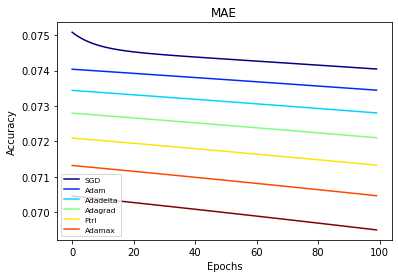

In [22]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np

number_of_lines= len(history_mae)
cm_subsection = np.linspace(0, 1, number_of_lines)
colors = [ cm.jet(x) for x in cm_subsection ] 


for data, color in zip(history_mae, colors):
  plt.title('MAE')
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(labels, fontsize=7.5)
  plt.plot(data, color= color)
path= os.path.join(ph.GetTuningData(),'learningRate_tuning','MAEVsLr.png')
plt.savefig(path)

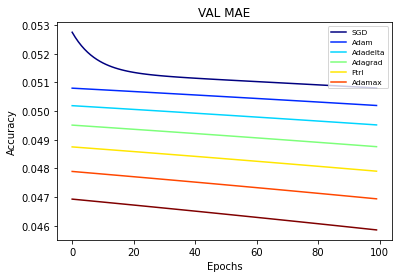

In [23]:
number_of_lines= len(history_val_mae)
cm_subsection = np.linspace(0, 1, number_of_lines)
colors = [ cm.jet(x) for x in cm_subsection ] 


for data, color in zip(history_val_mae, colors):
  plt.title('VAL MAE')
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(labels, fontsize=7.5)
  plt.plot(data, color= color)
path= os.path.join(ph.GetTuningData(),'learningRate_tuning','VALMAEVsLr.png')
plt.savefig(path)

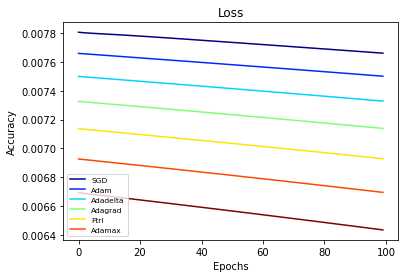

In [24]:
number_of_lines= len(history_loss)
cm_subsection = np.linspace(0, 1, number_of_lines)
colors = [ cm.jet(x) for x in cm_subsection ] 


for data, color in zip(history_loss, colors):
  plt.title('Loss')
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(labels, fontsize=7.5)
  plt.plot(data, color= color)
path= os.path.join(ph.GetTuningData(),'learningRate_tuning','LossVsLr.png')
plt.savefig(path)

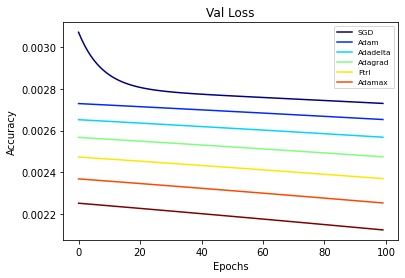

In [26]:
number_of_lines= len(history_val_loss)
cm_subsection = np.linspace(0, 1, number_of_lines)
colors = [ cm.jet(x) for x in cm_subsection ] 


for data, color in zip(history_val_loss, colors):
  plt.title('Val Loss')
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(labels, fontsize=7.5)
  plt.plot(data, color= color)
path= os.path.join(ph.GetTuningData(),'learningRate_tuning','ValLossVsLr.png')
plt.savefig(path)

In [27]:
model1_history=[history1.history['mae'],history1.history['val_mae'],
               history1.history['loss'],history1.history['val_loss']]

model2_history=[history2.history['mae'],history2.history['val_mae'],
               history2.history['loss'],history2.history['val_loss']]

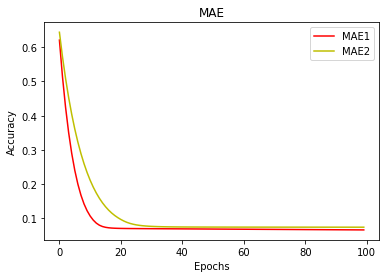

<Figure size 432x288 with 0 Axes>

In [35]:
epochs=range(len(model1_history[0])) # Get number of epochs

#------------------------------------------------
# Plot MAE and Loss
#------------------------------------------------
plt.plot(epochs,model1_history[0] , 'r')
# plt.plot(epochs, loss1, 'b')

plt.plot(epochs,model2_history[0], 'y')
# plt.plot(epochs, loss2, 'k')
plt.title('MAE')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE1", "MAE2",])

plt.figure()

path= os.path.join(ph.GetTuningData(),'layer_tuning','MAEVsBidir.png')
plt.savefig(path)

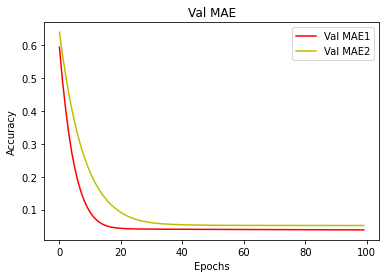

<Figure size 432x288 with 0 Axes>

In [36]:
plt.plot(epochs,model1_history[1] , 'r')
# plt.plot(epochs, loss1, 'b')

plt.plot(epochs,model2_history[1], 'y')
# plt.plot(epochs, loss2, 'k')
plt.title('Val MAE')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Val MAE1", "Val MAE2",])

plt.figure()
path= os.path.join(ph.GetTuningData(),'layer_tuning','ValMAEVsBidir.png')
plt.savefig(path)

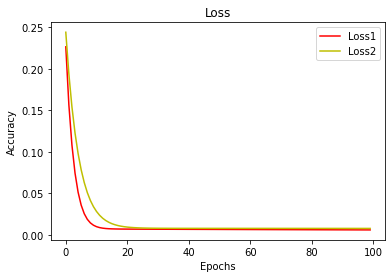

<Figure size 432x288 with 0 Axes>

In [37]:
plt.plot(epochs,model1_history[2] , 'r')
# plt.plot(epochs, loss1, 'b')

plt.plot(epochs,model2_history[2], 'y')
# plt.plot(epochs, loss2, 'k')
plt.title('Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Loss1", "Loss2",])

plt.figure()
path= os.path.join(ph.GetTuningData(),'layer_tuning','LossVsBidir.png')
plt.savefig(path)

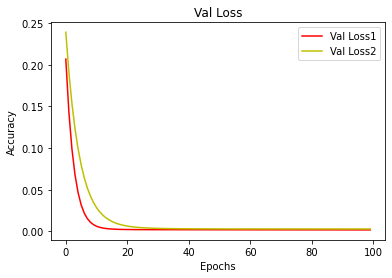

<Figure size 432x288 with 0 Axes>

In [38]:
plt.plot(epochs,model1_history[3] , 'r')
# plt.plot(epochs, loss1, 'b')

plt.plot(epochs,model2_history[3], 'y')
# plt.plot(epochs, loss2, 'k')
plt.title('Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Val Loss1", "Val Loss2",])

plt.figure()
path= os.path.join(ph.GetTuningData(),'layer_tuning','ValLossVsBidir.png')
plt.savefig(path)

In [47]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**((5*epoch) / 20))

model3 = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(750),
  tf.keras.layers.Dense(8),
])
optimizer = tf.keras.optimizers.Adamax(learning_rate= 1e-8)
model3.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history3 = model3.fit(train, epochs=100, validation_data= val,
                     callbacks=[lr_schedule])

Epoch 1/100
80/80 [==============================] - 11s 67ms/step - loss: 0.2678 - mae: 0.6719 - val_loss: 0.2944 - val_mae: 0.7071 - lr: 1.0000e-08
Epoch 2/100
80/80 [==============================] - 4s 54ms/step - loss: 0.2678 - mae: 0.6719 - val_loss: 0.2943 - val_mae: 0.7071 - lr: 1.7783e-08
Epoch 3/100
80/80 [==============================] - 5s 57ms/step - loss: 0.2678 - mae: 0.6719 - val_loss: 0.2943 - val_mae: 0.7070 - lr: 3.1623e-08
Epoch 4/100
80/80 [==============================] - 4s 54ms/step - loss: 0.2677 - mae: 0.6718 - val_loss: 0.2942 - val_mae: 0.7069 - lr: 5.6234e-08
Epoch 5/100
80/80 [==============================] - 4s 55ms/step - loss: 0.2676 - mae: 0.6717 - val_loss: 0.2941 - val_mae: 0.7068 - lr: 1.0000e-07
Epoch 6/100
80/80 [==============================] - 4s 55ms/step - loss: 0.2675 - mae: 0.6715 - val_loss: 0.2939 - val_mae: 0.7065 - lr: 1.7783e-07
Epoch 7/100
80/80 [==============================] - 4s 55ms/step - loss: 0.2672 - mae: 0.6711 - val_loss

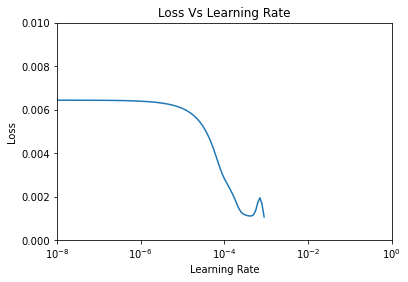

In [50]:
plt.semilogx(history2.history["lr"], history2.history["loss"])
plt.axis([1e-8, 1, 0, 0.01])
plt.title('Loss Vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
# plt.axvline(0.15)
path= os.path.join(ph.GetTuningData(),'layer_tuning','LossVsLR.png')
plt.savefig(path)

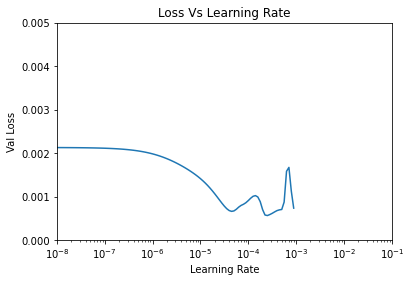

In [54]:
plt.semilogx(history2.history["lr"], history2.history["val_loss"])
plt.axis([1e-8, 10e-2, 0, 0.005])
plt.title('Loss Vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Val Loss')
# plt.axvline(0.15)
path= os.path.join(ph.GetTuningData(),'layer_tuning','ValLossVsLR.png')
plt.savefig(path)

In [49]:
model4 = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(750),
  tf.keras.layers.Dense(8),
])

optimizer = tf.keras.optimizers.Adamax(learning_rate= 5e-4)
model4.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history4 = model4.fit(train, epochs=100, validation_data= val,
                     )

Epoch 1/100
80/80 [==============================] - 11s 65ms/step - loss: 0.0756 - mae: 0.2811 - val_loss: 0.0011 - val_mae: 0.0366
Epoch 2/100
80/80 [==============================] - 4s 54ms/step - loss: 0.0090 - mae: 0.0800 - val_loss: 7.5821e-04 - val_mae: 0.0284
Epoch 3/100
80/80 [==============================] - 5s 57ms/step - loss: 0.0080 - mae: 0.0788 - val_loss: 7.5780e-04 - val_mae: 0.0288
Epoch 4/100
80/80 [==============================] - 4s 53ms/step - loss: 0.0076 - mae: 0.0765 - val_loss: 7.6833e-04 - val_mae: 0.0296
Epoch 5/100
80/80 [==============================] - 4s 53ms/step - loss: 0.0071 - mae: 0.0741 - val_loss: 7.8725e-04 - val_mae: 0.0307
Epoch 6/100
80/80 [==============================] - 4s 55ms/step - loss: 0.0067 - mae: 0.0716 - val_loss: 8.1321e-04 - val_mae: 0.0319
Epoch 7/100
80/80 [==============================] - 4s 56ms/step - loss: 0.0062 - mae: 0.0691 - val_loss: 8.4303e-04 - val_mae: 0.0330
Epoch 8/100
80/80 [==============================] 

In [56]:
model4 = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(750, input_shape=[1,8]),
  tf.keras.layers.Dense(8),
])

optimizer = tf.keras.optimizers.Adamax(learning_rate= 5e-4)
model4.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history4 = model4.fit(train, epochs=10, validation_data= val,
                     )

Epoch 1/10
80/80 [==============================] - 9s 64ms/step - loss: 0.0720 - mae: 0.2720 - val_loss: 0.0011 - val_mae: 0.0358
Epoch 2/10
80/80 [==============================] - 5s 57ms/step - loss: 0.0092 - mae: 0.0805 - val_loss: 8.4027e-04 - val_mae: 0.0280
Epoch 3/10
80/80 [==============================] - 5s 66ms/step - loss: 0.0082 - mae: 0.0788 - val_loss: 8.3311e-04 - val_mae: 0.0286
Epoch 4/10
80/80 [==============================] - 5s 61ms/step - loss: 0.0078 - mae: 0.0765 - val_loss: 8.3965e-04 - val_mae: 0.0295
Epoch 5/10
80/80 [==============================] - 7s 82ms/step - loss: 0.0073 - mae: 0.0741 - val_loss: 8.5139e-04 - val_mae: 0.0306
Epoch 6/10
80/80 [==============================] - 7s 89ms/step - loss: 0.0068 - mae: 0.0717 - val_loss: 8.6791e-04 - val_mae: 0.0317
Epoch 7/10
80/80 [==============================] - 5s 58ms/step - loss: 0.0063 - mae: 0.0691 - val_loss: 8.8584e-04 - val_mae: 0.0327
Epoch 8/10
80/80 [==============================] - 5s 60ms

In [7]:
model = models.model(train_data= train,val_data= val,test_data= None)
models.save_model(model,no_case= 0, no_model= 1 , vf_case=None)

Epoch 1/100
80/80 [==============================] - 11s 71ms/step - loss: 0.0762 - mae: 0.2832 - val_loss: 0.0011 - val_mae: 0.0386
Epoch 2/100
80/80 [==============================] - 5s 57ms/step - loss: 0.0092 - mae: 0.0796 - val_loss: 7.6796e-04 - val_mae: 0.0266
Epoch 3/100
80/80 [==============================] - 4s 55ms/step - loss: 0.0081 - mae: 0.0778 - val_loss: 7.5979e-04 - val_mae: 0.0270
Epoch 4/100
80/80 [==============================] - 4s 56ms/step - loss: 0.0077 - mae: 0.0758 - val_loss: 7.6584e-04 - val_mae: 0.0278
Epoch 5/100
80/80 [==============================] - 5s 56ms/step - loss: 0.0073 - mae: 0.0736 - val_loss: 7.8114e-04 - val_mae: 0.0291
Epoch 6/100
80/80 [==============================] - 6s 72ms/step - loss: 0.0068 - mae: 0.0714 - val_loss: 8.0364e-04 - val_mae: 0.0304
Epoch 7/100
80/80 [==============================] - 5s 67ms/step - loss: 0.0063 - mae: 0.0691 - val_loss: 8.3043e-04 - val_mae: 0.0316
Epoch 8/100
80/80 [==============================] 

In [32]:
import tensorflow as tf
model = tf.keras.models.load_model(os.path.join(ph.GetModelsData(),'LSTM01.h5'))
print(model.summary())
print('----------------')
loss, mae  = model.evaluate(train, verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 750)               2277000   
                                                                 
 dense (Dense)               (None, 8)                 6008      
                                                                 
Total params: 2,283,008
Trainable params: 2,283,008
Non-trainable params: 0
_________________________________________________________________
None
----------------
80/80 - 2s - loss: 0.0011 - mae: 0.0237 - 2s/epoch - 30ms/step


In [33]:
importlib.reload(gp)
importlib.reload(dp)
importlib.reload(tp)
importlib.reload(mp)
importlib.reload(ph)
importlib.reload(models)

<module 'TA_LSTMxFlutter.Training.models' from 'C:\\Users\\User\\Desktop\\Jupyter\\TA\\TA_LSTMxFlutter\\Training\\models.py'>

In [31]:
model, models_perform = models.load_and_evaluate(file='LSTM01.h5', test_file='CL_CD_Mach_Variation.csv', type='train')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 750)               2277000   
                                                                 
 dense (Dense)               (None, 8)                 6008      
                                                                 
Total params: 2,283,008
Trainable params: 2,283,008
Non-trainable params: 0
_________________________________________________________________
None
---------------------------------------------------------------------------
Model`s loss: 0.0010998245561495423 
 Model`s MAE: 0.023736998438835144


In [37]:
mp.history_plot(model.history)

KeyError: 'mae'

In [42]:
model.history.keys()

AttributeError: 'History' object has no attribute 'keys'